# Effect of AI on Customer Churn
## Predicting Customer Churn

## Import Libraries

In [119]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("packages imported")

packages imported


## Import Dataset

In [120]:
# import training file
train = pd.read_csv("train.csv")
train.head()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
0,1,59,2,7,7,2,18,5,2,1
1,2,49,2,6,5,1,3,2,0,0
2,3,35,2,3,3,3,8,2,1,1
3,4,63,2,3,3,2,6,6,2,1
4,5,28,4,6,6,1,11,3,-1,0


In [121]:
# import testing file
test = pd.read_csv("test.csv")
test.head()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
0,1,59,1,2,3,1,11,5,-1,1
1,2,49,3,4,3,2,2,0,2,1
2,3,35,3,7,6,2,22,4,0,1
3,4,63,2,8,8,1,25,4,-1,1
4,5,28,4,5,5,2,14,1,1,1


## Data Exploration

### Data dimensions, Feature Names, and Feature types

The dataset consist of following colums
- `Age`: The customer's age, ranging from 21 to 65 years.
- `AI_Interaction_Level`: A measure of the frequency and depth of the customer's interactions with AI-driven services.
- `Satisfaction_with_AI_Services`: Customer satisfaction rating with AI services.
- `AI_Personalization_Effectiveness`: Effectiveness of AI in delivering personalized experiences.
- `AI_Response_Time`: A categorical assessment of the response time of AI services.
- `Overall_Usage_Frequency`: The number of days in a month the customer interacted with the service.
- `Customer_Service_Interactions`: The number of times a customer engaged with customer service.
- `Change_in_Usage_Patterns`: Indicates changes in the customer's usage patterns, with values from -2 (significant decrease) to 2 (significant increase).
- `Customer_Churn`: Whether the customer churned (1) or not (0).

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                5000 non-null   int64
 1   Age                               5000 non-null   int64
 2   AI_Interaction_Level              5000 non-null   int64
 3   Satisfaction_with_AI_Services     5000 non-null   int64
 4   AI_Personalization_Effectiveness  5000 non-null   int64
 5   AI_Response_Time                  5000 non-null   int64
 6   Overall_Usage_Frequency           5000 non-null   int64
 7   Customer_Service_Interactions     5000 non-null   int64
 8   Change_in_Usage_Patterns          5000 non-null   int64
 9   Customer_Churn                    5000 non-null   int64
dtypes: int64(10)
memory usage: 390.8 KB


In [123]:
train.shape

(5000, 10)

In [124]:
train.columns

Index(['ID', 'Age', 'AI_Interaction_Level', 'Satisfaction_with_AI_Services',
       'AI_Personalization_Effectiveness', 'AI_Response_Time',
       'Overall_Usage_Frequency', 'Customer_Service_Interactions',
       'Change_in_Usage_Patterns', 'Customer_Churn'],
      dtype='object')

In [125]:
train.dtypes

ID                                  int64
Age                                 int64
AI_Interaction_Level                int64
Satisfaction_with_AI_Services       int64
AI_Personalization_Effectiveness    int64
AI_Response_Time                    int64
Overall_Usage_Frequency             int64
Customer_Service_Interactions       int64
Change_in_Usage_Patterns            int64
Customer_Churn                      int64
dtype: object

In [126]:
train.describe(include='all')

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,42.575000,2.468800,5.51060,5.525800,1.981600,15.515000,5.066200,-0.005000,0.418200
std,1443.520003,12.554597,0.940853,2.86446,2.884129,0.815227,8.703018,3.178402,1.421049,0.493313
min,1.000000,21.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000
25%,1250.750000,32.000000,2.000000,3.00000,3.000000,1.000000,8.000000,2.000000,-1.000000,0.000000
50%,2500.500000,43.000000,2.000000,5.00000,5.000000,2.000000,16.000000,5.000000,0.000000,0.000000
75%,3750.250000,53.000000,3.000000,8.00000,8.000000,3.000000,23.000000,8.000000,1.000000,1.000000
max,5000.000000,64.000000,4.000000,10.00000,10.000000,3.000000,30.000000,10.000000,2.000000,1.000000


### Missing Values

In [127]:
train.isnull().sum() 

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64

### Outliers

<AxesSubplot: xlabel='Customer_Churn'>

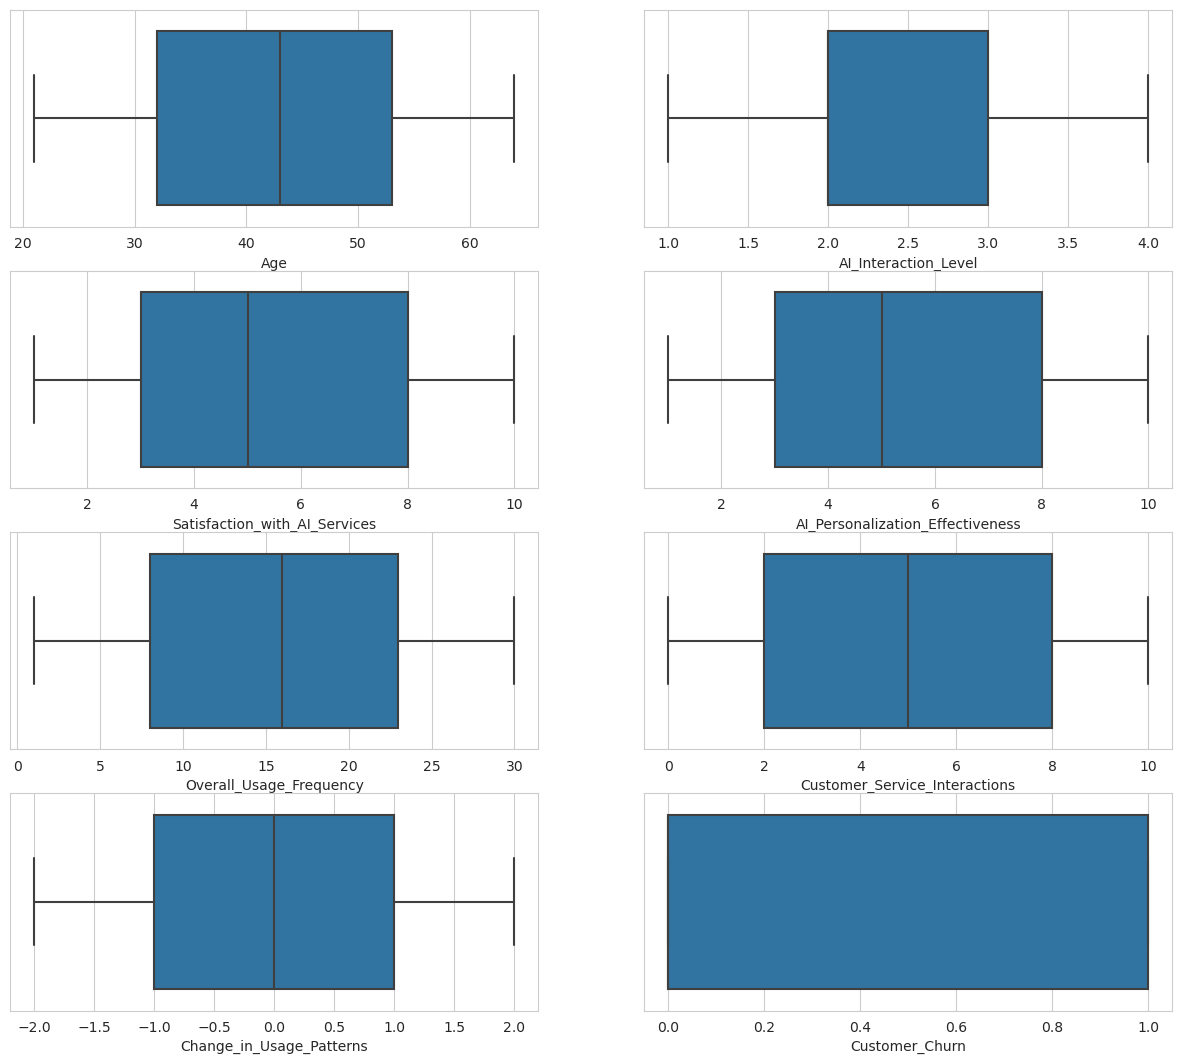

In [128]:
fig, ax = plt.subplots(4,2, figsize = (15,13))
sns.boxplot(x= train["Age"], ax = ax[0,0])
sns.boxplot(x= train["AI_Interaction_Level"], ax = ax[0,1])
sns.boxplot(x= train["Satisfaction_with_AI_Services"], ax = ax[1,0])
sns.boxplot(x= train["AI_Personalization_Effectiveness"], ax = ax[1,1])
sns.boxplot(x= train["Overall_Usage_Frequency"], ax = ax[2,0])
sns.boxplot(x= train["Customer_Service_Interactions"], ax = ax[2,1])
sns.boxplot(x= train["Change_in_Usage_Patterns"], ax = ax[3,0])
sns.boxplot(x= train["Customer_Churn"], ax = ax[3,1])

There are no outliers detected in any of the features.

## Exploratory Data Analysis

#### Univariate Analysis

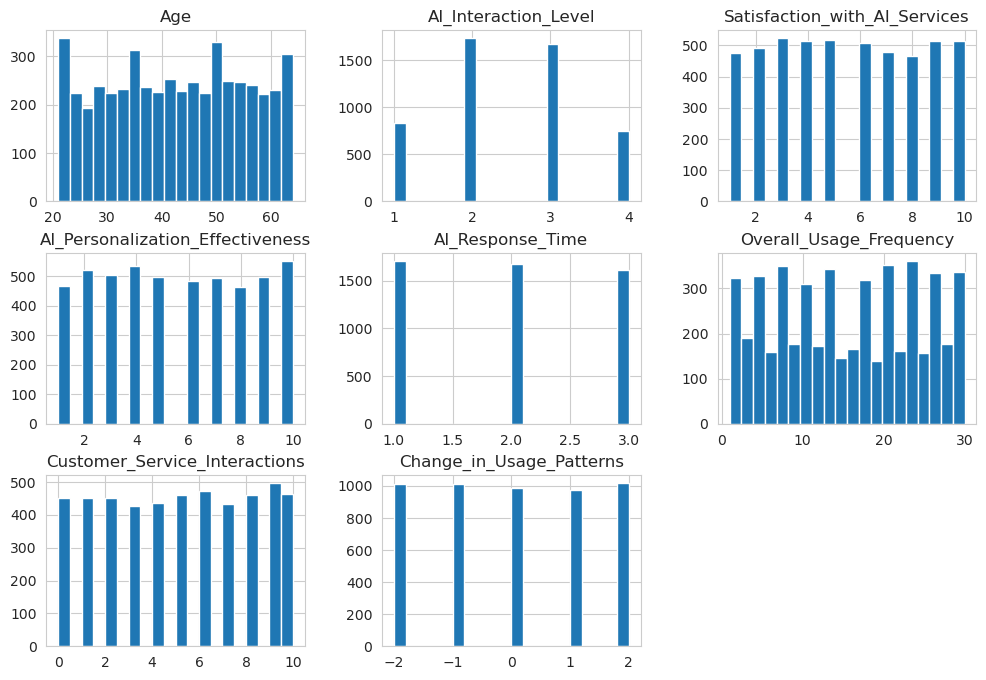

In [129]:
train.iloc[:, 1:-1].hist(figsize=(12,8),bins=20)
plt.show()

In [130]:
train.groupby(["Customer_Churn"]).mean().iloc[:, 2:]

,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns
Customer_Churn,,,,,,,
0,2.591612,5.761430,5.765555,1.993125,15.661396,5.056377,-0.038501
1,2.297944,5.161645,5.192253,1.965567,15.311334,5.079866,0.041607


In [74]:
groupby_usage_frequency.loc[groupby_usage_frequency["Change_in_Usage_Patterns"] > 0, :].groupby(["Customer_Churn"]).count()

,Change_in_Usage_Patterns
Customer_Churn,
0,1147
1,845


In [133]:
print(f"The churn rate of people who have positive usage change in the AI services is {845/(845+1147)}")

The churn rate of people who have positive usage change in the AI services is 0.4241967871485944


In [134]:
groupby_usage_frequency.loc[groupby_usage_frequency["Change_in_Usage_Patterns"] < 0, :].groupby(["Customer_Churn"]).count()

,Change_in_Usage_Patterns
Customer_Churn,
0,1215
1,807


In [135]:
print(f"The churn rate of people who have negative usage change in the AI services is {807/(807+1215)}")

The churn rate of people who have negative usage change in the AI services is 0.3991097922848665


In [136]:
print(train["Customer_Churn"].value_counts(),"\n")

# as proportions
print("As proportions:")
train['Customer_Churn'].value_counts(normalize=True)

0    2909
1    2091
Name: Customer_Churn, dtype: int64 

As proportions:


0    0.5818
1    0.4182
Name: Customer_Churn, dtype: float64

<AxesSubplot: xlabel='Customer_Churn', ylabel='count'>

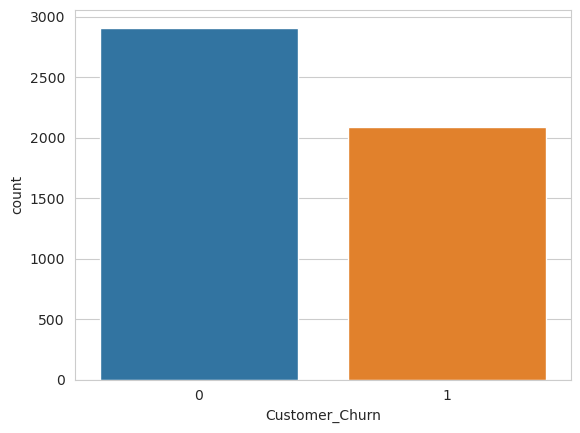

In [137]:
# number of churned and non-churned customers
sns.countplot(x = "Customer_Churn", data = train)

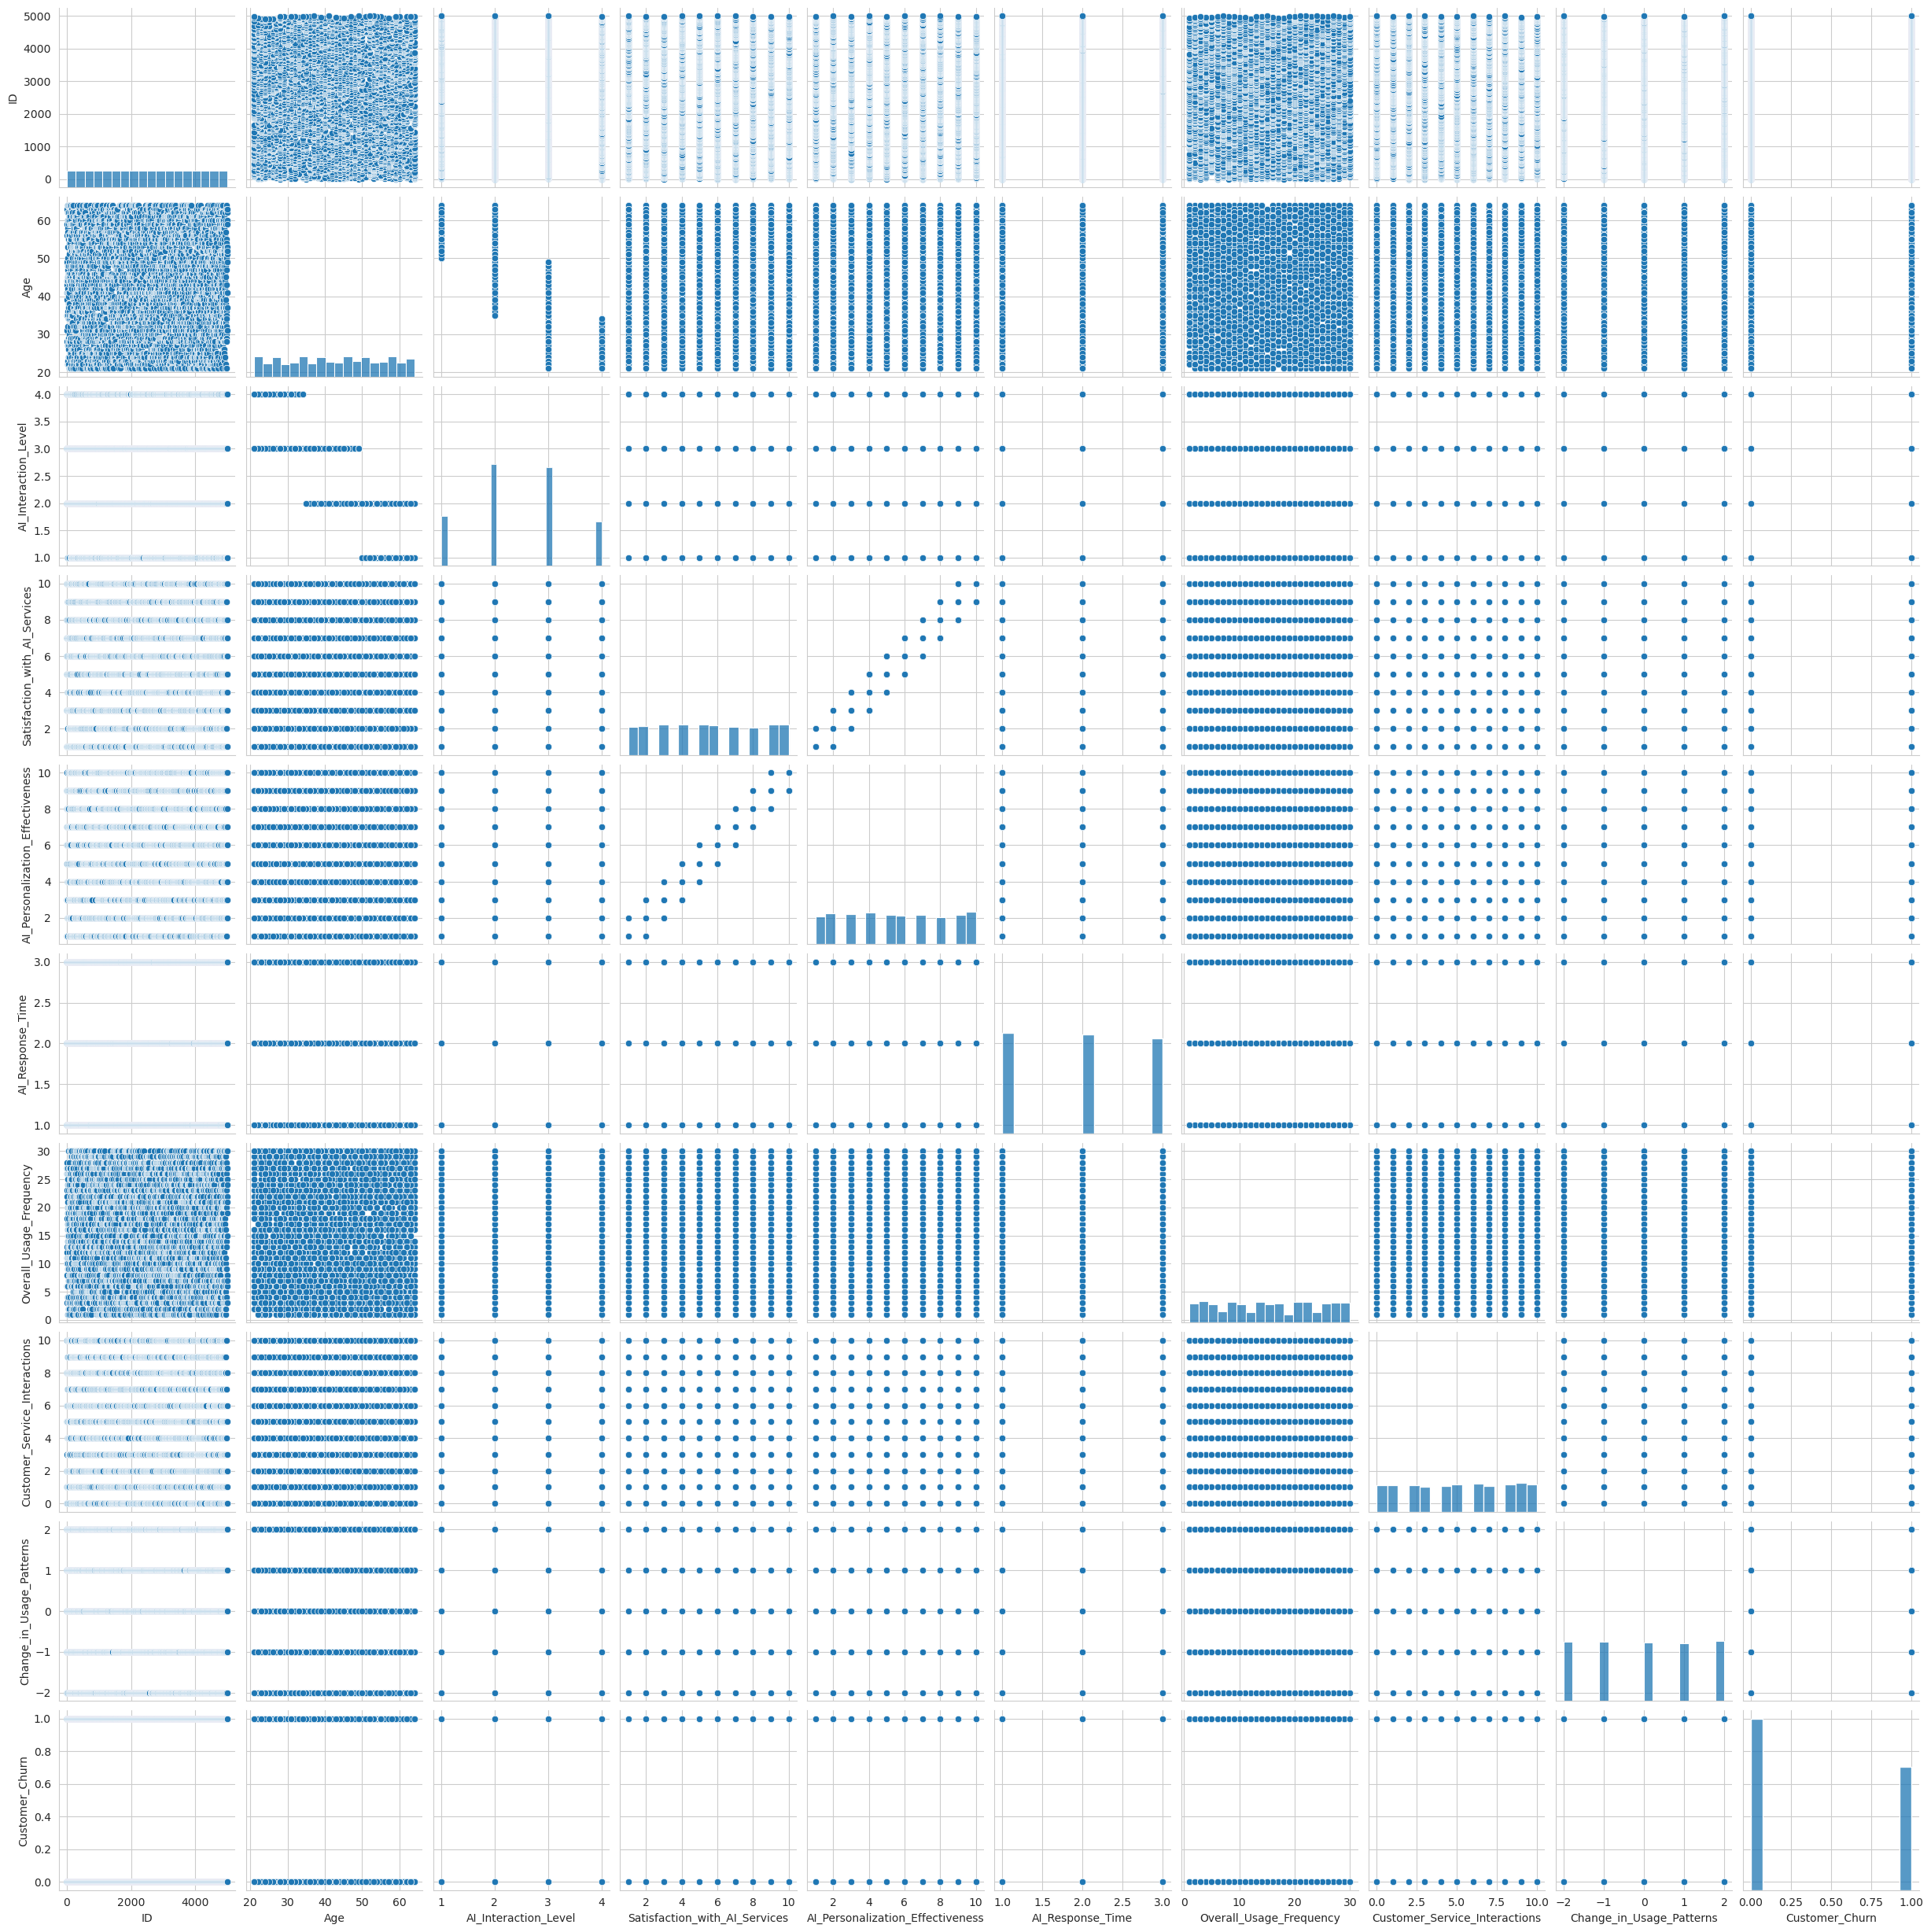

In [138]:
sns.pairplot(data=train)

### Correlation

<AxesSubplot: >

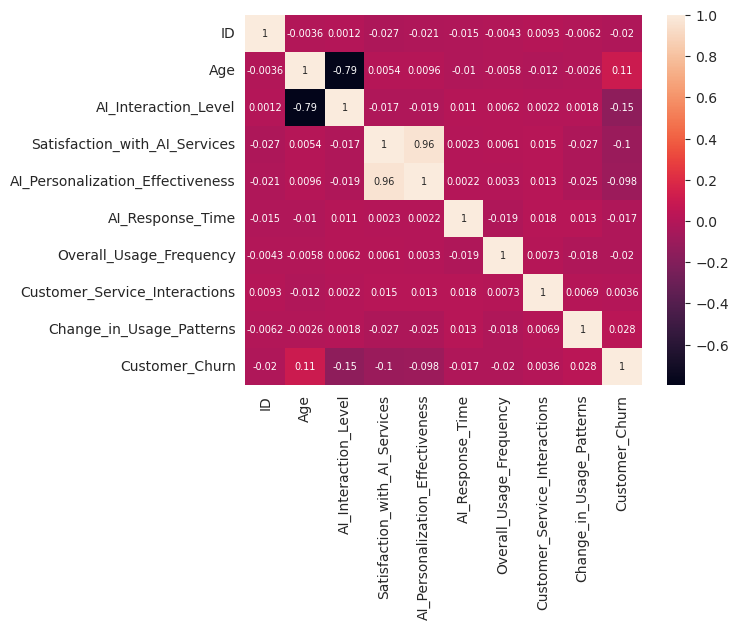

In [139]:
# create heat map of all variables
sns.heatmap(train.corr(), annot=True, annot_kws={"fontsize":7})

Observe a negative, high correlation between `Age` and `AI_Interaction_Level`, and a positive high correlation between`AI_Personalization_Effectiveness` and `Satisfaction_with_AI_Services`.

#### Bivariate Analysis

We can now examine two features in pairs to inspect the relationships.

Below, we see that higher generations tend to have decreased AI interaction levels.

In [140]:
# create Generation feature
# Age ranges from 21-65 years
# GenZ: 12-27
# Millennials: 28-43
# GenX: 44-59
# Boomers II: 60-69

bins = [19, 27, 43, 59, 69]
labels = ['GenZ', 'Millennials', 'GenX', 'BoomersII']
train['Generation'] = pd.cut(train['Age'], bins, labels=labels)
test['Generation'] = pd.cut(test['Age'], bins, labels=labels)

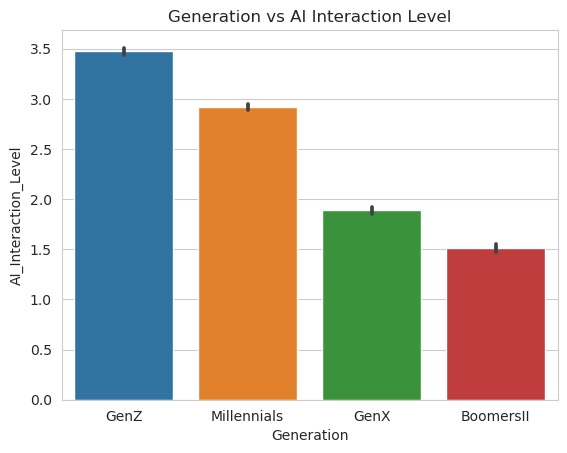

In [141]:
# plot bar plot of Generation vs AI_Interaction_Level
sns.barplot(x='Generation', y='AI_Interaction_Level', data=train)
plt.title("Generation vs AI Interaction Level")
plt.show()

In [142]:
# map each generation group to a numerical value 
generation_mapping = {'GenZ': 1,'Millennials': 2,'GenX': 3, 'BoomersII': 4}
train['Generation'] = train['Generation'].map(generation_mapping)
test['Generation'] = test['Generation'].map(generation_mapping)

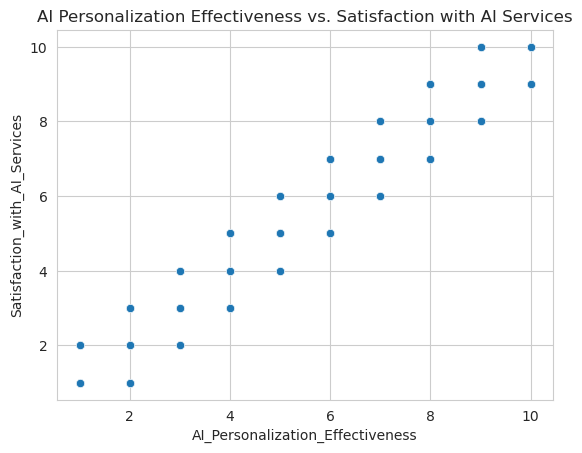

In [143]:
sns.scatterplot(train, x= "AI_Personalization_Effectiveness", y= "Satisfaction_with_AI_Services")
plt.title("AI Personalization Effectiveness vs. Satisfaction with AI Services")
plt.show()

No matter how satisfied the customer can be of SAP's product, churning still arises. On the contrary, several people who are disatisfied (satisfaction level = 0) with the product choose to continue using the product.

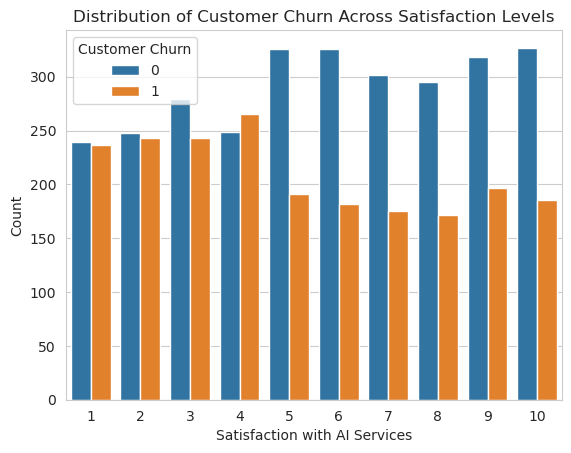

In [144]:
sns.countplot(data=train, x="Satisfaction_with_AI_Services", hue="Customer_Churn")
plt.xlabel("Satisfaction with AI Services")
plt.ylabel("Count")
plt.title("Distribution of Customer Churn Across Satisfaction Levels")
plt.legend(title="Customer Churn")
plt.show()

## Feature Geneartion: Average_Usage_Pattern_Per_Day
* Creating interaction terms between `Overall_Usage_Frequency` and `Change_in_Usage_Patterns` to see relationship in average usage frequency per day and churn rate
* `Average_Usage_Pattern_Per_Day`: is the ratio of ai usage per day (`Overall_Usage_Frequency` / 30 days) * `Change_in_Usage_Patterns`
* Visualization with boxplot below:

In [145]:
train['Average_Usage_Pattern_Per_Day'] = (train['Overall_Usage_Frequency'] / 30) * train['Change_in_Usage_Patterns']
test['Average_Usage_Pattern_Per_Day'] = (test['Overall_Usage_Frequency'] / 30) * test['Change_in_Usage_Patterns']

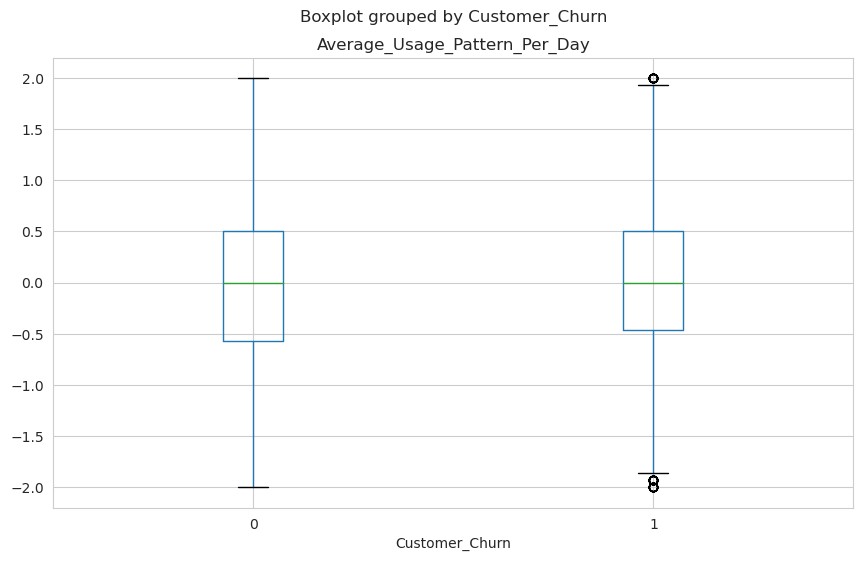

In [146]:
train.boxplot(column='Average_Usage_Pattern_Per_Day', by='Customer_Churn', figsize=(10, 6))
sns.set_style("whitegrid")

There are a few high and low outliers of interest in the boxplot for churned customers. Let's take a better look:

In [147]:
df_by_churn = train.groupby('Customer_Churn')

churned_df = df_by_churn.get_group(1)
# determine the different quantiles
Q1 = churned_df['Average_Usage_Pattern_Per_Day'].quantile(0.25)
Q3 = churned_df['Average_Usage_Pattern_Per_Day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = churned_df[(churned_df['Average_Usage_Pattern_Per_Day'] < lower_bound) |
                    (churned_df['Average_Usage_Pattern_Per_Day'] > upper_bound)]

The high outliers show exceptionally high usage of SAP's AI software per day, but their end outcomes are 1 for having churned. Several points to notice in the data are: the average age of these churners are at the higher end with mean 44.61111, their average interaction level with AI is 2.222222 and their satisfaction is pretty low (3.722222), yet their customer service interaction is slightly higher than average(6.222222 vs 5.066200).

In [148]:
high_outliers = churned_df[churned_df['Average_Usage_Pattern_Per_Day'] > upper_bound]
high_outliers.describe()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn,Average_Usage_Pattern_Per_Day
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.0,18.0,18.0
mean,2437.722222,44.611111,2.222222,3.722222,3.888889,1.666667,30.0,6.222222,2.0,1.0,2.0
std,1491.962379,13.315797,0.942809,2.562296,2.867442,0.840168,0.0,3.191082,0.0,0.0,0.0
min,318.000000,23.000000,1.000000,1.000000,1.000000,1.000000,30.0,0.000000,2.0,1.0,2.0
25%,1671.500000,32.250000,1.250000,1.250000,2.000000,1.000000,30.0,4.250000,2.0,1.0,2.0
50%,1948.000000,44.000000,2.000000,3.000000,3.000000,1.000000,30.0,6.000000,2.0,1.0,2.0
75%,3886.500000,55.000000,3.000000,5.000000,5.750000,2.000000,30.0,9.000000,2.0,1.0,2.0
max,4835.000000,64.000000,4.000000,9.000000,10.000000,3.000000,30.0,10.000000,2.0,1.0,2.0


The low outliers show exceptionally high average decrease in usage rate per day, and their end outcomes are 1 for having churned. Several points to notice in the data are: the average age of these churners are at the higher end with mean 42.933333, their average interaction level with AI is 2.333333 and their satisfaction is 4.400000, yet their customer service interaction is slightly higher than average(5.733333 vs 5.066200).

In [149]:
low_outliers = churned_df[churned_df['Average_Usage_Pattern_Per_Day'] < lower_bound]
low_outliers.describe()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn,Average_Usage_Pattern_Per_Day
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.000000
mean,2373.533333,42.933333,2.333333,4.400000,4.366667,2.066667,29.366667,5.733333,-2.0,1.0,-1.957778
std,1444.684734,13.577195,1.093345,3.001149,3.022711,0.827682,0.490133,3.095417,0.0,0.0,0.032676
min,110.000000,22.000000,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,-2.0,1.0,-2.000000
25%,934.500000,30.000000,1.000000,2.000000,2.000000,1.000000,29.000000,4.000000,-2.0,1.0,-2.000000
50%,2683.000000,43.000000,2.000000,3.500000,3.500000,2.000000,29.000000,5.500000,-2.0,1.0,-1.933333
75%,3506.250000,54.750000,3.000000,7.750000,7.000000,3.000000,30.000000,9.000000,-2.0,1.0,-1.933333
max,4706.000000,63.000000,4.000000,10.000000,10.000000,3.000000,30.000000,10.000000,-2.0,1.0,-1.933333


What does this tell us? Well from the high and low extreme of churners, we know that whether their average usage rate is exceptionally low or high, they are generally in the older age range and have lower than average interaction level, satsifaction, and personalization effectiveness, yet their customer service interaction is higher than average and their overall usage frequency in the extremes. This indicates that these churners spent about an entire month trying to learn SAP's AI, yet are unable to gain that deep interaction with the AI, thus resulting in low quality experience. Another point to note is that their average customer interaction services are greater than average, but doesn't seemed to have had a significant influence on their experience. In fact, we see that the mean customer service interactions seems to be the same in both the churners and the non-churners: 

<AxesSubplot: xlabel='Customer_Churn', ylabel='Customer_Service_Interactions'>

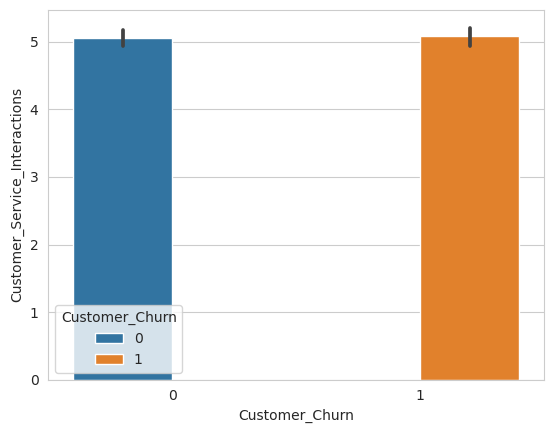

In [151]:
sns.barplot(data=train, x='Customer_Churn', y='Customer_Service_Interactions', hue='Customer_Churn')

## Observation

- GenZ has the highest interaction level with AI services, whereas Boomers II has the lowest interaction level. 
- Positive linear relationship between the two features can be seen, which leads to an explanation that satisfaction level rises as the AI personalization effectiveness rises.
- Mean values for each feature, grouped by `Customer_Churn`, is similar whether the customer is churned or not. Howevever, there is a negative value in mean of `Change_in_Usage_Patterns` for non-churned customers, while there is a positive value in mean of `Change_in_Usage_Patterns` for churned customers. (What does this imply? Maybe elaborate with `Overall_Usage_Frequency`?)

## Methology

We will use Random Forest Classification with Scikit-Learn to predict status of customers churning from SAP's AI services.

## Random Forest Classification

In [152]:
# pre-defining evaluation functions

# print classification report and accuracy

def print_classification_report(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    acc_model = accuracy_score(y_true, y_pred)
    print("Accuracy Score:", acc_model)

    return acc_model

# plot confusion matrix for model

def print_conf_matrix(y_true, y_pred):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['0: Not Churned', '1: Churned']
    
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape)

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(ticks=np.arange(2) + 0.5, labels=categories)
    plt.yticks(ticks=np.arange(2) + 0.5, labels=categories)

### Split labels in train and test data

In [153]:
# drop Age and Average_Usage_Pattern_Per_Day feature
train = train.drop(['Age', 'Average_Usage_Pattern_Per_Day'], axis=1)
test = test.drop(['Age', 'Average_Usage_Pattern_Per_Day'], axis=1)

In [154]:
# split labels and predictors for train and test set
X_train = train.drop(["Customer_Churn"], axis=1)
Y_train = train["Customer_Churn"]

X_test = test.drop(["Customer_Churn"], axis=1)
Y_test = test["Customer_Churn"]

### Build model

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       714
           1       0.61      0.57      0.58       536

    accuracy                           0.66      1250
   macro avg       0.65      0.64      0.65      1250
weighted avg       0.65      0.66      0.65      1250

Accuracy Score: 0.656


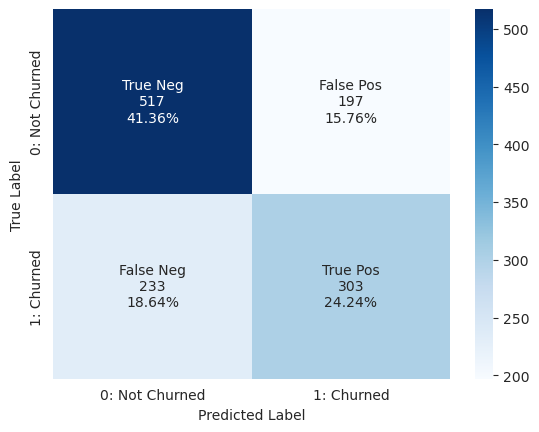

In [155]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=123)
randomforest.fit(X_train, Y_train)
y_pred_RF = randomforest.predict(X_test)

print_classification_report(Y_test, y_pred_RF)
print_conf_matrix(Y_test, y_pred_RF)

### Feature selection

In [156]:
# Get numerical feature importances
feature_names = train.columns.tolist()
importances = list(randomforest.feature_importances_)
feature_importance_pairs = list(zip(feature_names, importances))

for feature, importance in feature_importance_pairs:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: ID, Importance: 0.2454735690498701
Feature: AI_Interaction_Level, Importance: 0.07398963147093984
Feature: Satisfaction_with_AI_Services, Importance: 0.0964558519936606
Feature: AI_Personalization_Effectiveness, Importance: 0.08945520813417022
Feature: AI_Response_Time, Importance: 0.05379296547548524
Feature: Overall_Usage_Frequency, Importance: 0.17780421446746755
Feature: Customer_Service_Interactions, Importance: 0.12792291809935746
Feature: Change_in_Usage_Patterns, Importance: 0.08302272465080676
Feature: Customer_Churn, Importance: 0.05208291665824233


Top 5 (excluding ID):
1. Overall_Usage_Frequency: 0.17780421446746755
2. Customer_Service_Interactions: 0.12792291809935746
3. Satisfaction_with_AI_Services: 0.0964558519936606
4. AI_Personalization_Effectiveness: 0.08945520813417022
5. Change_in_Usage_Patterns: 0.08302272465080676

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       714
           1       0.72      0.69      0.70       536

    accuracy                           0.75      1250
   macro avg       0.75      0.74      0.74      1250
weighted avg       0.75      0.75      0.75      1250

Accuracy Score: 0.7512


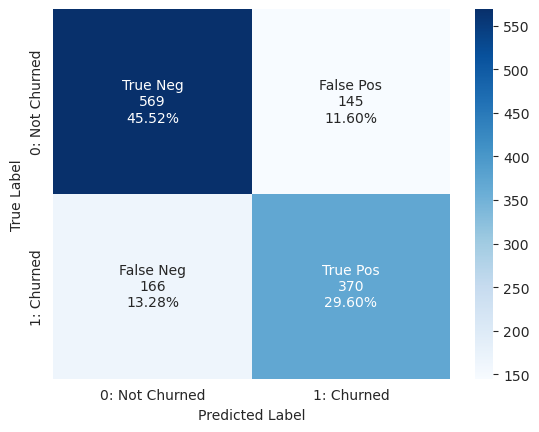

In [158]:
X_train_impor = X_train[['Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency', 'Customer_Service_Interactions', 'Change_in_Usage_Patterns']]
X_test_impor = X_test[['Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency', 'Customer_Service_Interactions', 'Change_in_Usage_Patterns']]

randomforest.fit(X_train_impor, Y_train)
y_pred_RF_impor = randomforest.predict(X_test_impor)

print_classification_report(Y_test, y_pred_RF_impor)
print_conf_matrix(Y_test, y_pred_RF_impor)

### Create submissions file

In [ ]:
import csv

In [ ]:
def submission(id, y_pred):
    data = list(zip(id, y_pred))
    csv_file = 'predictions_submission.csv'

    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
    
        # Write header
        writer.writerow(['ID', 'Prediction'])
        
        # Write data rows
        for row in data:
            writer.writerow(row)

In [ ]:
submission(X_test['ID'], y_pred_RF_impor)